In [1]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
chunk_paths = [path for path in pathlib.Path("../data/raw/steam-reviews-dataset/").glob("*.csv")]
dfs = []
for i in chunk_paths:
    dfs.append(pd.read_csv(i))
df = pd.concat(dfs)
df.head()

CPU times: user 58.6 s, sys: 9.16 s, total: 1min 7s
Wall time: 1min 10s


,steamid,appid,voted_up,votes_up,votes_funny,weighted_vote_score,playtime_forever,playtime_at_review,num_games_owned,num_reviews,review,unix_timestamp_created,unix_timestamp_updated
0,76561198024044792,342550,False,4,0,0.571289,39,39,574,22,"While this game seems promising, it's really j...",1601155855,1601155855
1,76561198225145856,342550,False,0,0,0.000000,103,103,52,12,"Fuck this game. No updates, no nothing. Just T...",1592746747,1592746747
2,76561198066087993,342550,False,1,0,0.476190,191,191,149,2,Nothing about this game should have legally be...,1590110583,1590110583
3,76561198118355028,342550,True,1,0,0.524829,1679,1679,98,33,The game looks interesting whit that Lovercraf...,1582193846,1582193846
4,76561198038091775,342550,False,0,0,0.000000,107,107,604,61,Got this game when it was a paid for. I enjoye...,1579007301,1579007301


In [3]:
print(f"N unique users: {df["steamid"].nunique()}")
print(f"N unique apps: {df["appid"].nunique()}")

N unique users: 6976390
N unique apps: 8183


In [4]:
df["unix_timestamp_created"] = pd.to_datetime(df["unix_timestamp_created"], unit="s")
df["unix_timestamp_updated"] = pd.to_datetime(df["unix_timestamp_updated"], unit="s")
# df["unix_timestamp_created"] = 

In [15]:
df["appid"].value_counts().head()

appid
730       976212
359550    338197
105600    322228
4000      297053
271590    294087
Name: count, dtype: int64

<Axes: xlabel='appid', ylabel='Count'>

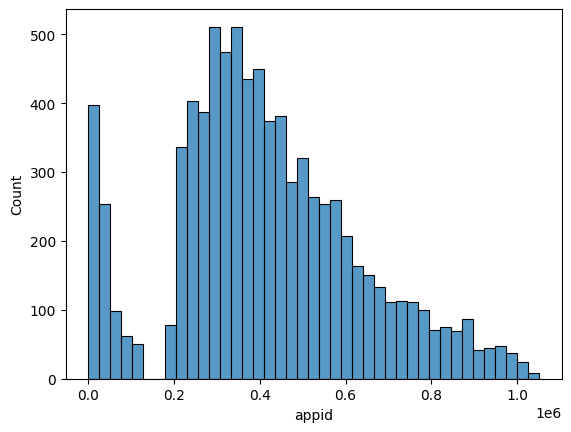

In [14]:
sns.histplot(data=df.groupby("appid").count(), x="appid")

In [ ]:
sns.countplot(df.steamid)

Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x10d045e40>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/weakref.py", line 105, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103336e40>>
Traceback (most recent call last):
  File "/Users/rproskuryakov/Projects/recsys-playground/.venv/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103336e40>>
Traceback (most recent call last):
  File "/Users/rproskuryakov/Projects/recsys-playground/.venv/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
distribution of number of reviews per game
distribution of number of reviews per user